Automatically created module for IPython interactive environment
Keyword:Christopher
--------------------------
Results found in file a-0.png


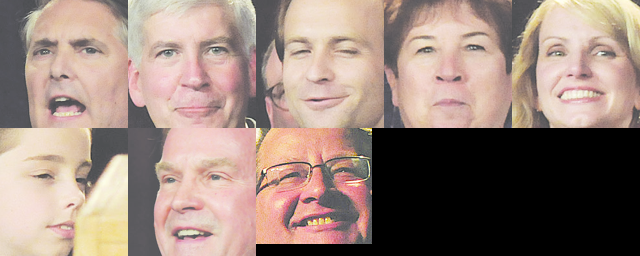

Results found in file a-3.png


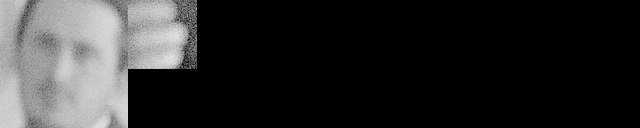

Keyword:Mark
--------------------------
Results found in file a-0.png


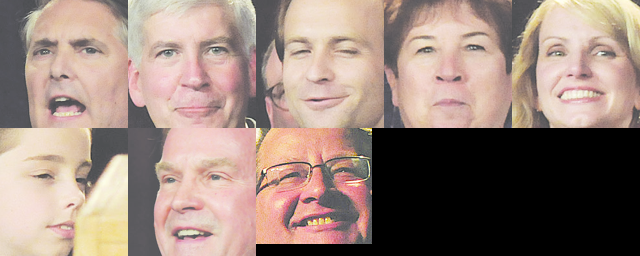

Results found in file a-1.png


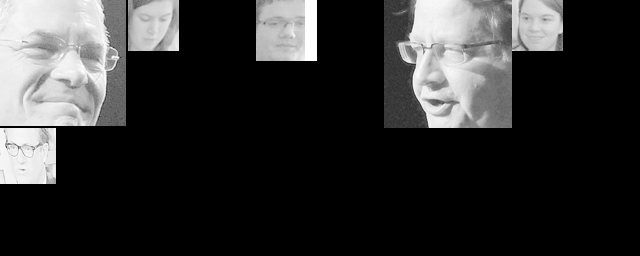

Results found in file a-10.png
No faces detected in image file.
Results found in file a-13.png


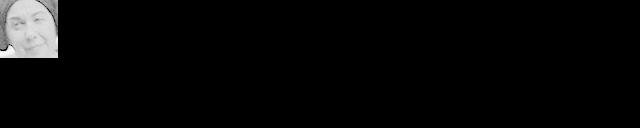

Results found in file a-2.png


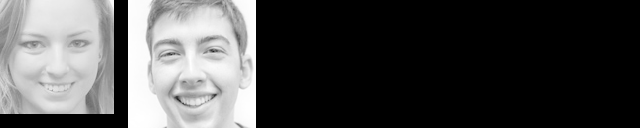

Results found in file a-3.png


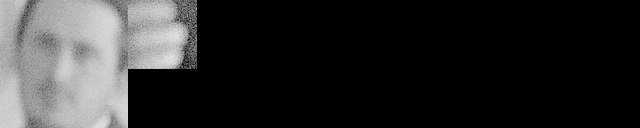

Results found in file a-8.png
No faces detected in image file.


In [3]:
import zipfile
import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display

def main():
    # create zipfile object
    file = zipfile.ZipFile('../project/images.zip')

    # loading the face detection classifier
    face_cascade = cv.CascadeClassifier("../project/utf-8''haarcascade_frontalface_default.xml")

    # dictionary that will store information about each image
    obj_dict = {}

    # list of names of images in zipfile
    img_list = file.infolist()
    
    # List of keys words to search for obj_dict
    key_words = ('Christopher', 'Mark')

    # process each image
    for img_info in img_list:
        # call to function to initialize dictionary entries
        obj_dict = init_dict(obj_dict, img_list, img_info)

        # populate strings of text for each image
        obj_dict[img_info.filename]['strings'] = capture_text(file, img_info)

        # populate dictionary with image array's
        obj_dict[img_info.filename]['faces'] = detect_faces(face_cascade, file, img_info)

        # build a list of image arrays that have the coordinates of faces in images
        face_arrays = obj_dict[img_info.filename]['faces']

        # if there is a face detected then add it to contact sheet
        if len(face_arrays) >= 1:
            obj_dict[img_info.filename]['contact_sheet'] = contact_sheet(crop_face(file, img_info, face_arrays))
        
    # search for key words in image file and display contact sheet
    for word in key_words:
        print('Keyword:{}'.format(word))
        print('--------------------------')
        for file in obj_dict:
            if word in obj_dict[file]['strings']:
                print('Results found in file {}'.format(file))
                if obj_dict[file]['contact_sheet'] == None:
                    print('No faces detected in image file.')
                else:
                    display(obj_dict[file]['contact_sheet'])

def init_dict(obj_dict, img_list, img_info):
    """Initialize nested dictionary key:value pairs 
    for img_info in img_list.
    
    Arguments:
        obj_dict {dict} -- Multi-object dictionary
        img_list {list} -- List[ZipInfo]
        img_info {ZipInfo} -- class zipfile.ZipInfo
    """   
    obj_dict[img_info.filename] = {}
    obj_dict[img_info.filename]['strings'] = ''
    obj_dict[img_info.filename]['faces'] = []
    obj_dict[img_info.filename]['contact_sheet'] = None

    return(obj_dict)

def detect_faces(face_cascade, file, img_info):
    """Returns image array of faces detected in image.
    
    Arguments:
        face_cascade {face detection classifier} -- face detection classifier
        file {ZipFile} -- ZipFile
        img_info {ZipInfo} -- class zipfile.ZipInfo
    """    
    img_file = file.open(img_info)
    img = Image.open(file.open(img_info)).convert('RGB')
    cv_img = np.array(img)
    gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30))
    return(face)

def capture_text(file, img_info):
    """Convert text images to strings
    
    Arguments:
        file {ZipFile} -- Zipfile of images
        img_info {ZipInfo} -- Zip information about each object
    """    
    img_file = file.open(img_info)
    img = Image.open(file.open(img_info)).convert('RGB')
    img = img.convert('L')
    text = pytesseract.image_to_string(img)
    return(text)

def crop_face(file, img_info, face_arrays):
    """Returns a list of face images.
    
    Arguments:
        file {ZipFile} -- Zipfile of images
        img_info {ZipInfo} -- Zip information about each object
        face_arrays {List} -- List of arrays of faces
    """    
    faces = []
    img_file = file.open(img_info)
    img = Image.open(file.open(img_info)).convert('RGB')
    for face in face_arrays:
        x,y,w,h = face
        crop_image = img.crop((x,y,x+w,y+h))
        crop_image.thumbnail((128,128))
        faces.append(crop_image)
    return(faces)

def contact_sheet(img_lst):
    """Returns a contact sheet with face images on it.
    
    Arguments:
        img_lst {List} -- A list of face images.
    """    
    height = (len(img_lst)/5) - (int(len(img_lst)/5))
    if height == 0:
        h = int(len(img_lst)/5)
    elif height > 0:
        h = int(len(img_lst)/5) + 1
    w = 5*128
    contact_sheet= PIL.Image.new('RGB', (w, int(h * 128)))
    x = 0
    y = 0
    for img in img_lst:        
        contact_sheet.paste(img, (x, y) )
        if x+128 == contact_sheet.width:
            x=0
            y=y+128
        else:
            x=x+128

    return(contact_sheet)

# Execute main() function
if __name__ == '__main__':
    print(__doc__)
    main()
    cv.destroyAllWindows()  
